In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame({'A': [1,2,None,4], 'B': [None,2,3,4]})
data

,A,B
0,1.0,NaN
1,2.0,2.0
2,NaN,3.0
3,4.0,4.0


from matplotlib import pyplot as plt
data['A'].plot(kind='hist', bins=20, title='A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['B'].plot(kind='hist', bins=20, title='B')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='A', y='B', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['A'].plot(kind='line', figsize=(8, 4), title='A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['B'].plot(kind='line', figsize=(8, 4), title='B')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data_clean = data.dropna()
print(data_clean)

     A    B
1  2.0  2.0
3  4.0  4.0


In [ ]:
data_filled = data.fillna(data.mean())
print(data_filled)

          A    B
0  1.000000  3.0
1  2.000000  2.0
2  2.333333  3.0
3  4.000000  4.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the DataFrame
data = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 2, 3, 4]})

# Fill NaN values with the mean of each column
data_filled = data.fillna(data.mean())

# Now you can proceed with normalization
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_filled) # data_filled is now defined
print(data_normalized)

[[0.         0.5       ]
 [0.33333333 0.        ]
 [0.44444444 0.5       ]
 [1.         1.        ]]


In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
data = pd.DataFrame({'color': ['red', 'blue', 'green', 'red']})
encoder = LabelEncoder()
data['color_label'] = encoder.fit_transform(data['color'])
print(data)

   color  color_label
0    red            2
1   blue            0
2  green            1
3    red            2


In [ ]:
#One hot encoding
data = pd.DataFrame({'color': ['red', 'blue', 'green', 'red']})
data_onehot = pd.get_dummies(data)
print(data_onehot)

   color_blue  color_green  color_red
0       False        False       True
1        True        False      False
2       False         True      False
3       False        False       True


In [ ]:
#One hot encoding
data = pd.DataFrame({'color': ['red', 'blue', 'green', 'red', 'blue', 'green']})
data_onehot = pd.get_dummies(data)
print(data_onehot)

   color_blue  color_green  color_red
0       False        False       True
1        True        False      False
2       False         True      False
3       False        False       True
4        True        False      False
5       False         True      False


In [ ]:
#Outlier Detection
from scipy import stats
import numpy as np

data = np.array([1,2,2,3,4,3,4,5,8,6,4,4,4,15,3,2,4,5,3,-100])
z_scores = stats.zscore(data)
outliers = data[np.abs(z_scores) > 3]
print(outliers)

[-100]


In [ ]:
data = [1,2,2,2,3,1,1,15,2,2,2,3,1,1,2]
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is', mean)
print('standard deviation of the dataset is', std)

mean of the dataset is 2.6666666666666665
standard deviation of the dataset is 3.3598941782277745


In [ ]:
#Z Score is also calles standard score.
#This score helps to understand if a data value is greater or smaller than mean and how far awy it is from the mean
#Calculate Z score, If Z score>3, print ift as a outlier.
threshold = 3
outlier = []
for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score) > threshold:
        outlier.append(i)
print('outlier in dateset is', outlier)

outlier in dateset is [15]


In [ ]:
#text data processing
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
corpus = ["This is a sentence.", "This is another sentence."]
filtered_corpus = [' '.join([word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS]) for text in corpus]
print(filtered_corpus)

['sentence.', 'sentence.']


In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
corpus = ["running", "runner", "ran"]
stemmed_words = [ps.stem(word) for word in corpus]
print(stemmed_words)

['run', 'runner', 'ran']


In [ ]:
#train-test split
from sklearn.model_selection import train_test_split

x = pd.DataFrame({'Feature1' : [1,2,3,4,5,6,7,8,9,10]})
# Change y to a list instead of a set:
y = pd.Series([1,0,1,0,1,1,1,0,0,1])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train, X_test)

   Feature1
9        10
4         5
6         7
5         6
2         3
0         1
1         2
3         4    Feature1
8         9
7         8


In [ ]:
#Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')




In [ ]:
data = pd.read_csv("used cars.csv")

In [ ]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [ ]:
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


In [ ]:
data.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [ ]:
(data.isnull().sum()/len(data))*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


In [ ]:
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [ ]:
from datetime import date # Corrected the module name from datatime to datetime
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


In [ ]:
#Let's split the name and introduce new variables "Brand" and "Model"
data['Brand'] = data.Name.str.split().str.get(0)

In [ ]:
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [ ]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [ ]:
print(data.Brand.unique())
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [ ]:
searchfor = ['Isuzu','ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,7,Mini,CooperConvertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,NaN,NaN,7,ISUZU,D-MAXV-Cross
7132,Mini Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.8 kmpl,1998 CC,192 bhp,5.0,44.59 Lakh,NaN,7,Mini,ClubmanCooper
7157,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,NaN,9,Land,RoverRange
7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.8 kmpl,1998 CC,112 bhp,5.0,NaN,NaN,11,Mini,CooperCountryman


In [ ]:
data["Brand"].replace({"ISUZU" : "Isuzu", "Mini" : "Mini Cooper", "Land": "Land Rover"})

,Brand
0,Maruti
1,Hyundai
2,Honda
3,Maruti
4,Audi
...,...
7248,Volkswagen
7249,Volkswagen
7250,Nissan
7251,Volkswagen


In [ ]:
import pandas as pd
import numpy as np

# Assuming your data is in a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual file path
data = pd.read_csv('used cars.csv')

cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("categroical Variables")
print(cat_cols)
print("Numerical Variables")
print(num_cols)

categroical Variables
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price']
Numerical Variables
['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price']


categroical Variables
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price']
Numerical Variables
['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price']
S.No.
skew : 0.0


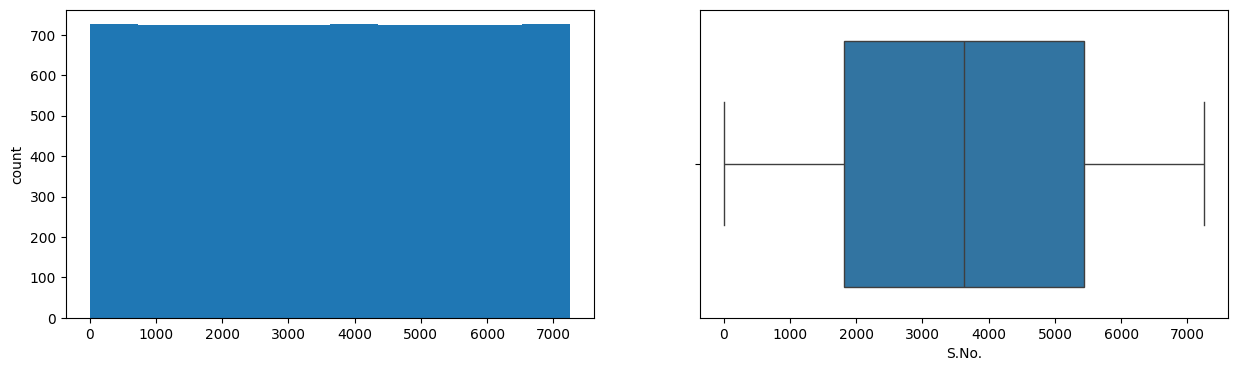

Year
skew : -0.84


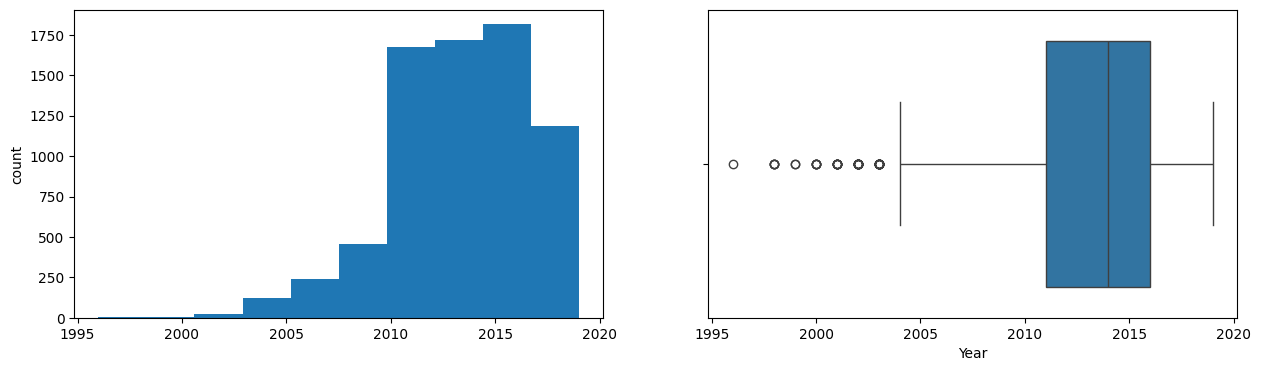

Kilometers_Driven
skew : 61.58


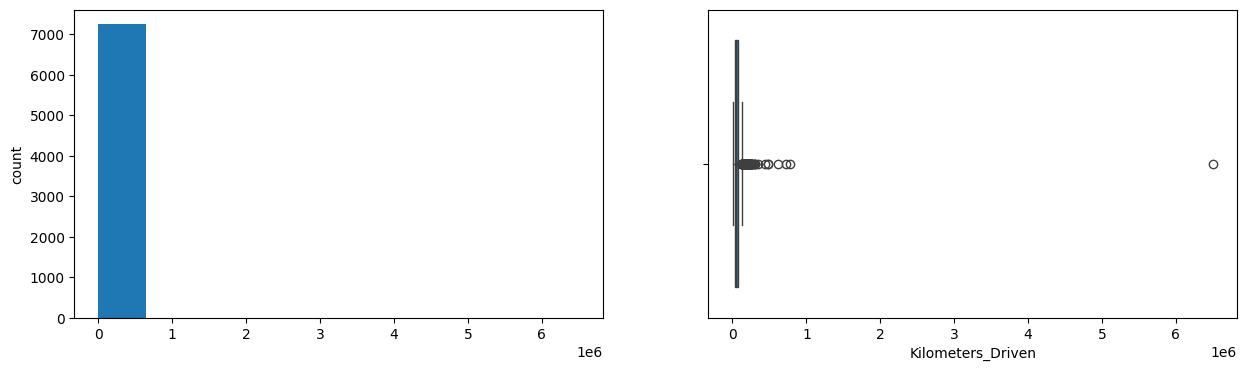

Seats
skew : 1.9


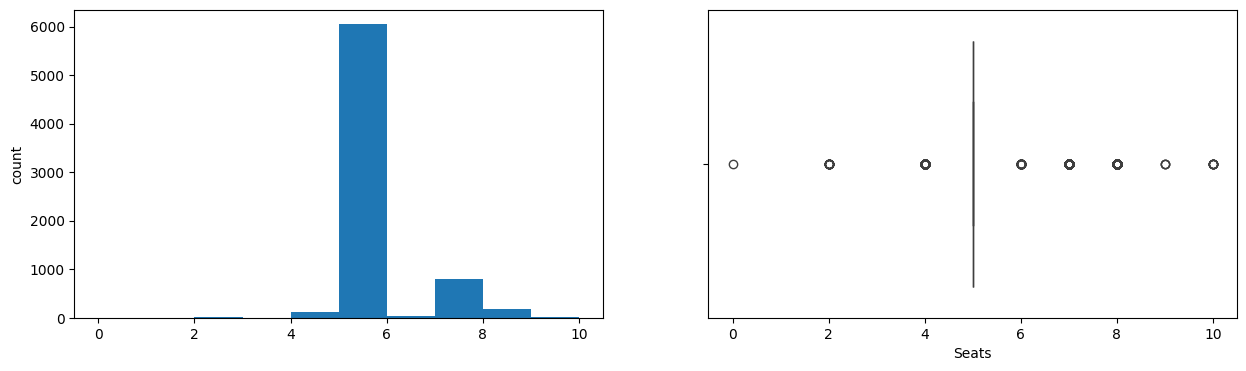

Price
skew : 3.34


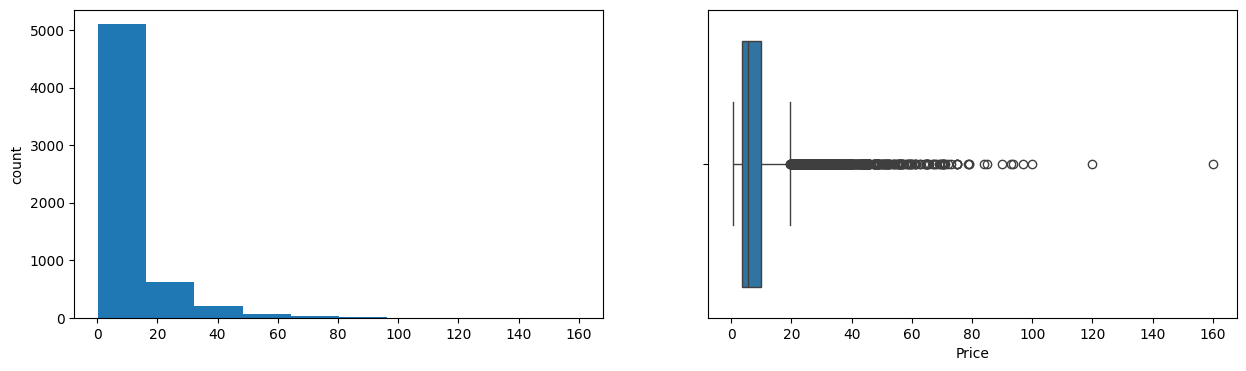

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import seaborn as sns # Assuming you're using seaborn for boxplot, import it too

# Assuming your data is in a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual file path
data = pd.read_csv('used cars.csv')

cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("categroical Variables")
print(cat_cols)
print("Numerical Variables")
print(num_cols)

for col in num_cols:
    print(col) # Indented this line by 4 spaces
    print('skew :', round(data[col].skew(), 2))
    plt.figure(figsize=(15, 4)) # Now plt is defined and can be used
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col]) # Assuming you're using seaborn, ensure it's imported
    plt.show()

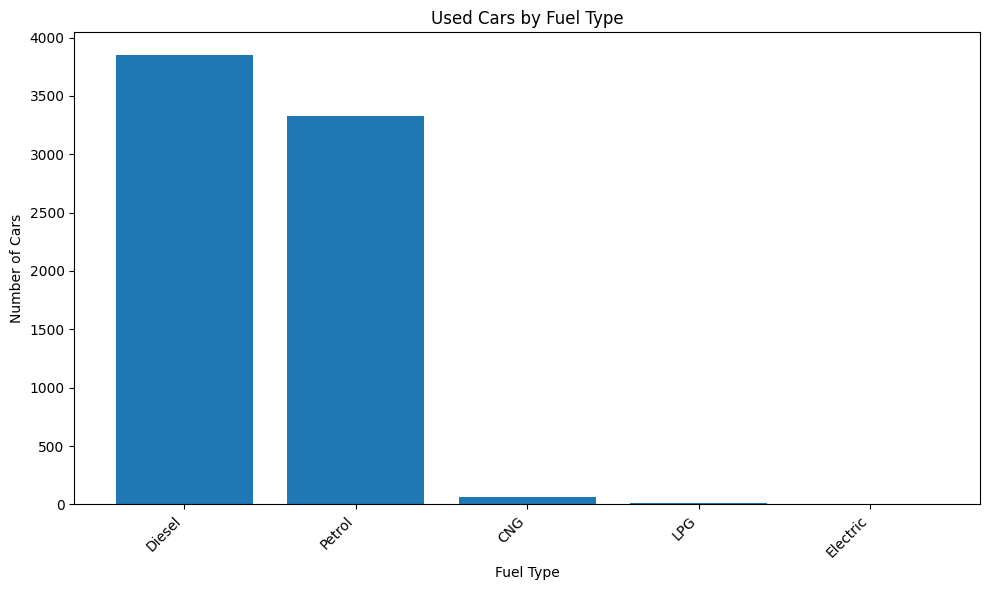

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64


In [ ]:
# Assuming your data is in a CSV file named 'used cars.csv'
data = pd.read_csv('used cars.csv')

# Group data by fuel type and count the occurrences
fuel_type_counts = data['Fuel_Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(fuel_type_counts.index, fuel_type_counts.values)
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.title("Used Cars by Fuel Type")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Print the counts for each fuel type
print(fuel_type_counts)

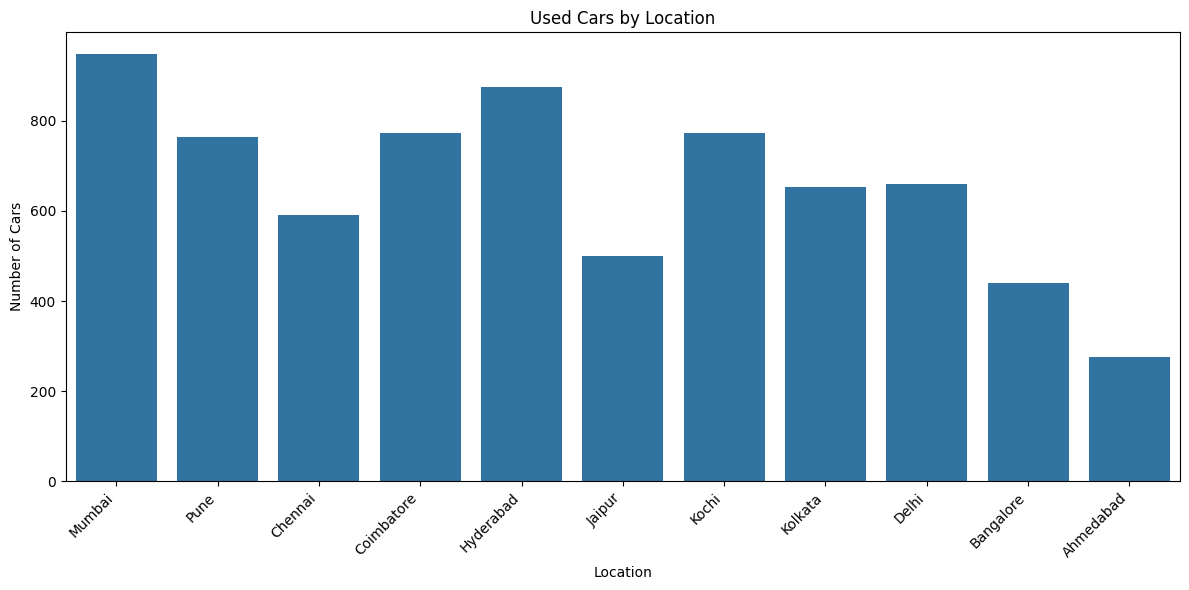

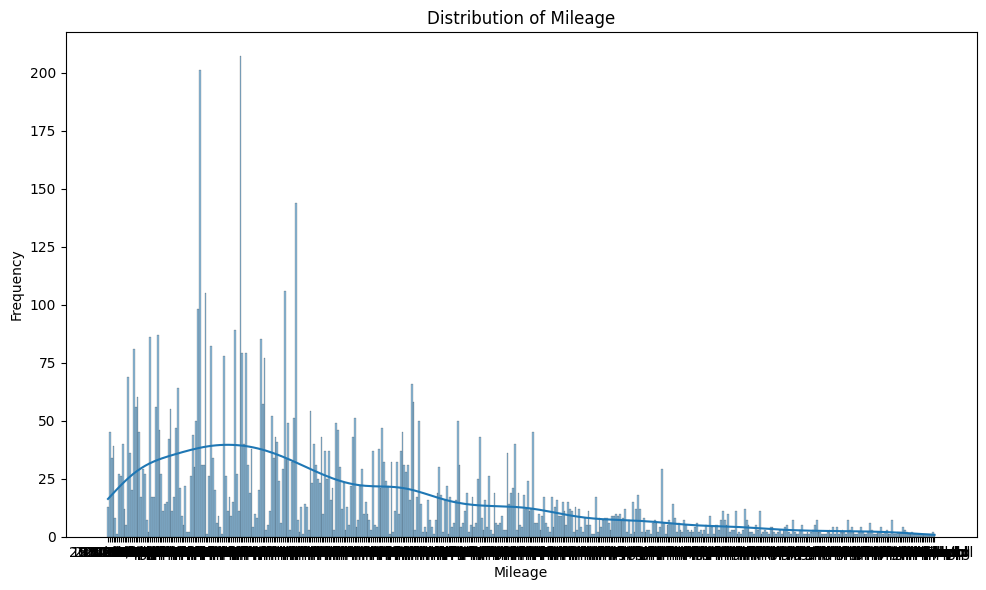

In [ ]:
# --- Plot for Location ---
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=data)  # Assuming 'Location' is the column name
plt.xlabel("Location")
plt.ylabel("Number of Cars")
plt.title("Used Cars by Location")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Plot for Mileage ---
plt.figure(figsize=(10, 6))
sns.histplot(data['Mileage'], bins=20, kde=True)  # Assuming 'Mileage' is the column name
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.title("Distribution of Mileage")
plt.tight_layout()
plt.show()

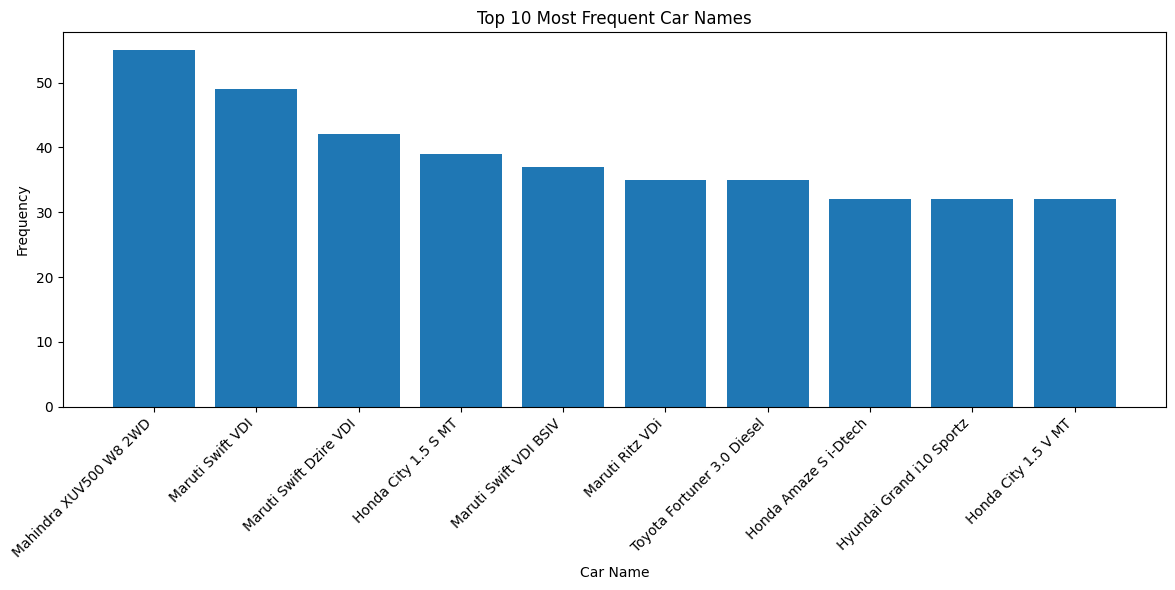

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

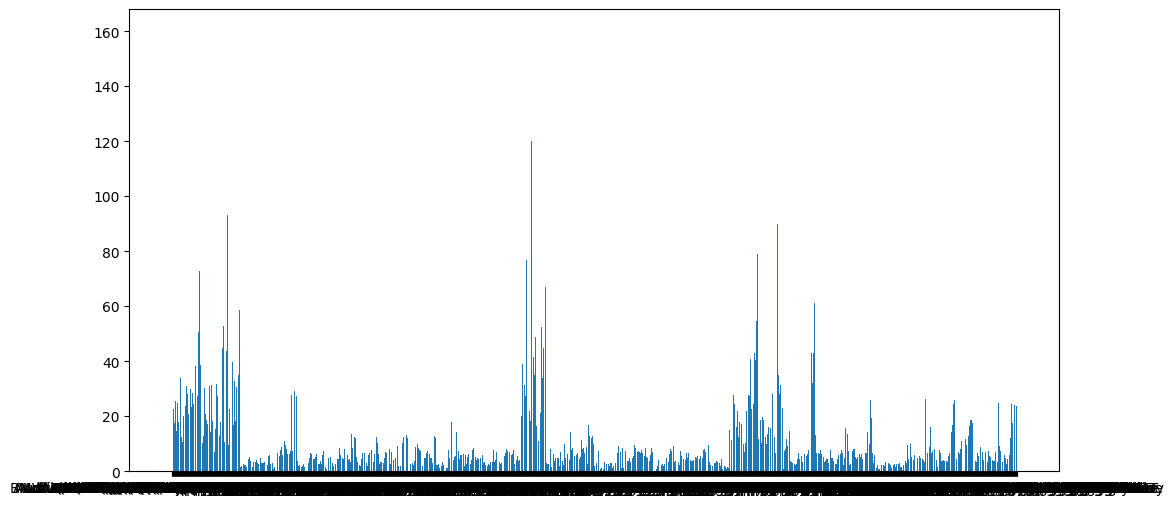

In [ ]:
data = pd.read_csv('used cars.csv')

# Extract car names (assuming the column is named 'Name')
car_names = data['Name']

# 1. Top N Most Frequent Car Names
top_n = 10  # You can change this to the desired number of top car names
top_car_names = car_names.value_counts().head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(top_car_names.index, top_car_names.values)
plt.xlabel("Car Name")
plt.ylabel("Frequency")
plt.title(f"Top {top_n} Most Frequent Car Names")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Analyze Car Names by Brand (if you have a 'Brand' column)
if 'Brand' in data.columns:
    brand_car_counts = data.groupby('Brand')['Name'].nunique()

    plt.figure(figsize=(12, 6))
    plt.bar(brand_car_counts.index, brand_car_counts.values)
    plt.xlabel("Brand")
    plt.ylabel("Number of Unique Car Names")
    plt.title("Unique Car Names by Brand")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 3. Analyze Price or Other Metrics by Car Name
# Example: Average price of each car name
average_price_by_car = data.groupby('Name')['Price'].mean()  # Assuming 'Price' column exists

plt.figure(figsize=(12, 6))
plt.bar(average_price_by_car.index, average_price_by_car.values)
plt.xlabel

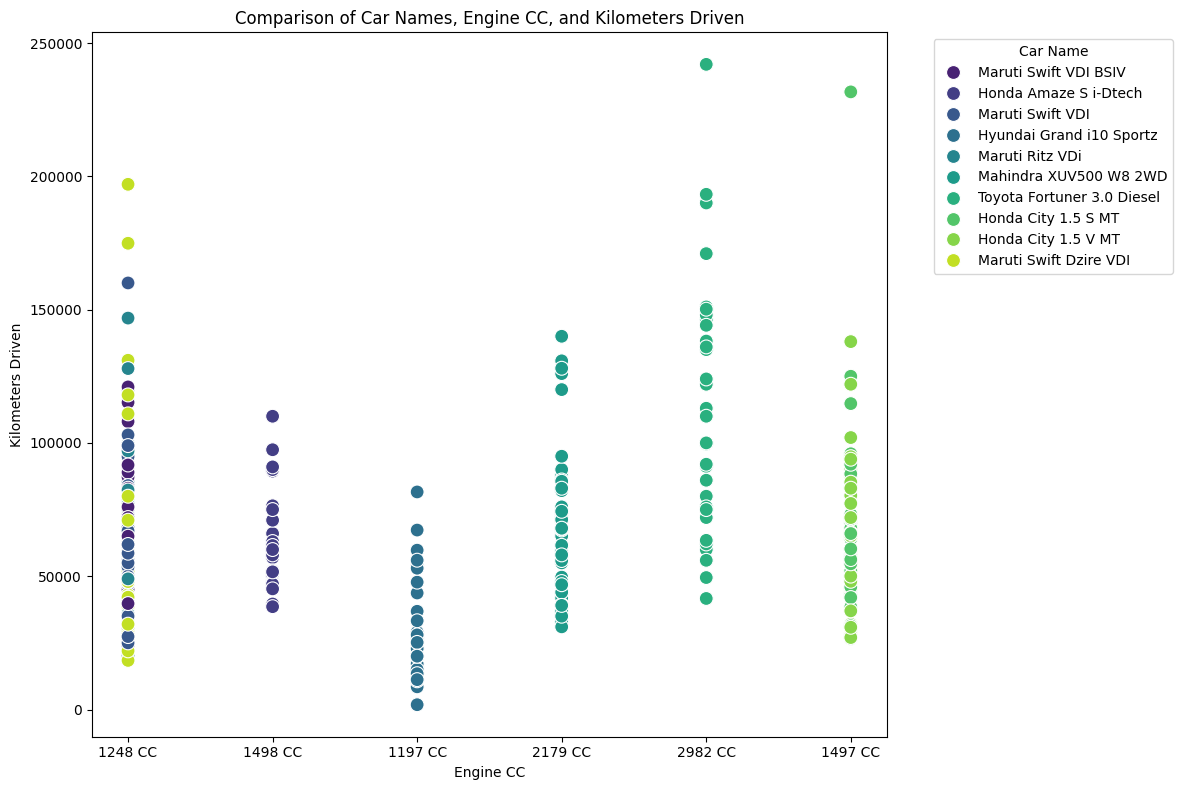

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a CSV file named 'used cars.csv'
data = pd.read_csv('used cars.csv')

# Select a subset of car names for better visualization (optional)
top_car_names = data['Name'].value_counts().head(10).index  # Top 10 most frequent
filtered_data = data[data['Name'].isin(top_car_names)]

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Engine', y='Kilometers_Driven', hue='Name', data=filtered_data, palette='viridis', s=100)
plt.xlabel("Engine CC")
plt.ylabel("Kilometers Driven")
plt.title("Comparison of Car Names, Engine CC, and Kilometers Driven")
plt.legend(title="Car Name", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('used cars.csv')

# --- Assuming 'Mileage' column has values like '16.36 kmpl' ---
# Extract numeric part from 'Mileage' and convert to float
data['Mileage'] = data['Mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)

features = ['Mileage', 'Year', 'Engine']
target = 'Price'

# --- Ensure 'Engine' is numeric, handle non-numeric values if present ---
data['Engine'] = pd.to_numeric(data['Engine'], errors='coerce')  # Convert to numeric, replace non-numeric with NaN
data['Engine'].fillna(data['Engine'].mean(), inplace=True)      # Impute missing values with the mean


data = pd

<ipython-input-14-55234987c371>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Engine'].fillna(data['Engine'].mean(), inplace=True)      # Impute missing values with the mean


<ipython-input-18-6f5cf8c60cd5>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Engine'].fillna(data['Engine'].mean(), inplace=True)


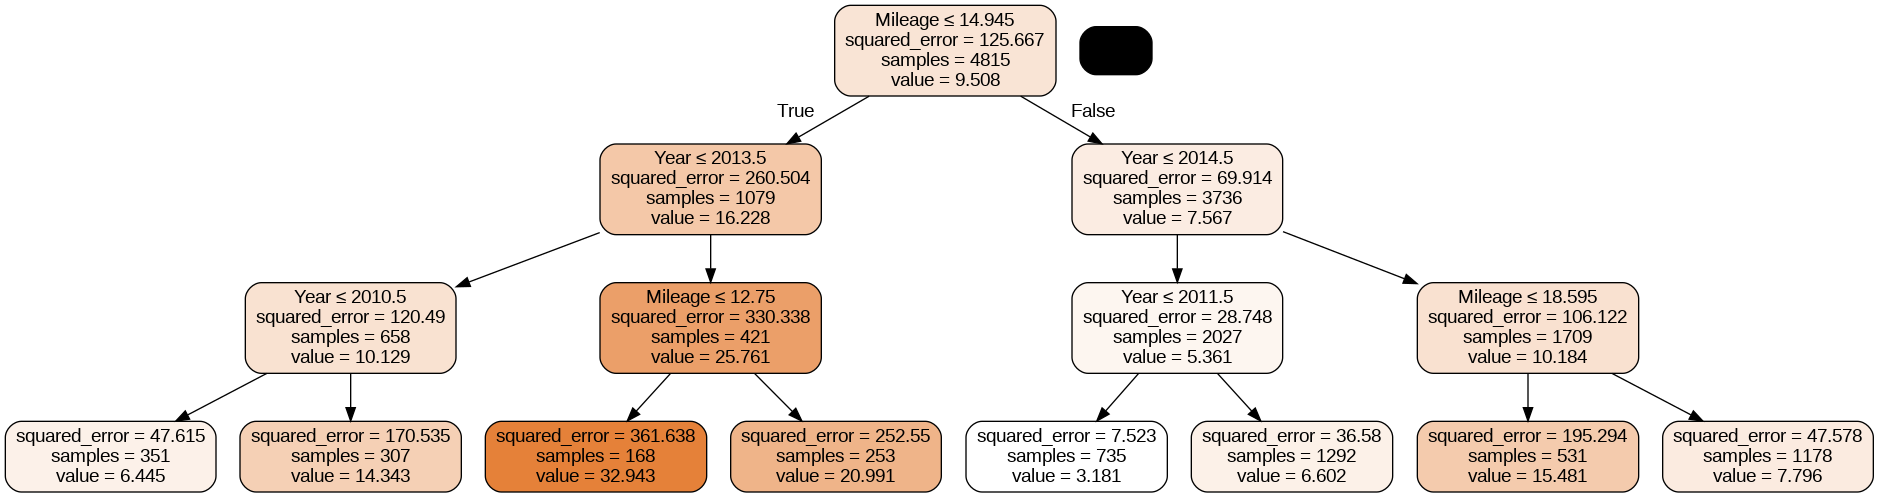

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_graphviz  # Changed to DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pydotplus
from IPython.display import Image

# Load and preprocess data
data = pd.read_csv('used cars.csv')
data['Mileage'] = data['Mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
data['Engine'] = pd.to_numeric(data['Engine'], errors='coerce')
data['Engine'].fillna(data['Engine'].mean(), inplace=True)
features = ['Mileage', 'Year', 'Engine']
target = 'Price'
data = pd.get_dummies(data, columns=['Fuel_Type', 'Location'])

# Before splitting, handle NaN values in the 'Price' column (target variable)
# Here we are dropping any row that has Nan in the Price column (inplace=True to modify the original dataframe)
data.dropna(subset=[target], inplace=True) # this line added to drop Nan in the price column

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Create and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)  # Changed to DecisionTreeRegressor
tree_model.fit(X_train, y_train)

# Export the tree to DOT format
dot_data = export_graphviz(tree_model, out_file=None,
                           feature_names=features,
                           filled=True, rounded=True,
                           special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph in the notebook
Image(graph.create_png())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
housing = fetch_california_housing(as_frame=True)
housing = housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


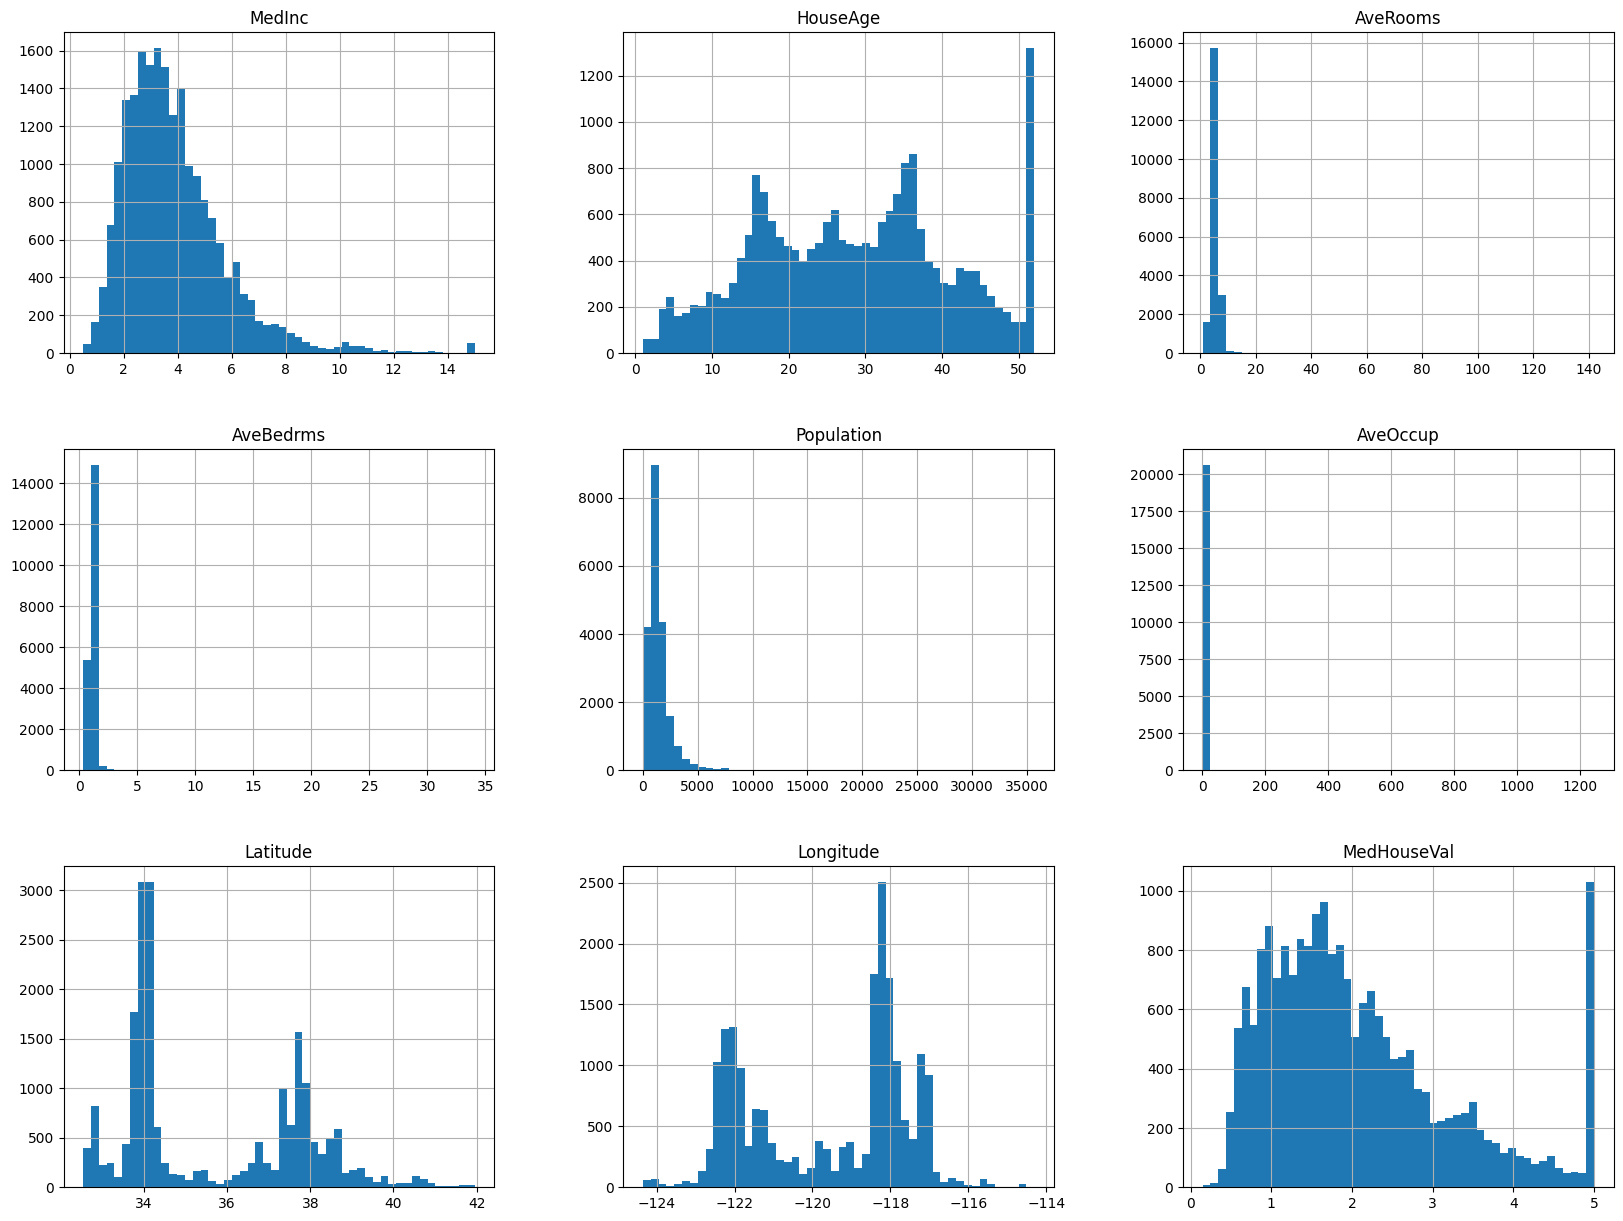

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

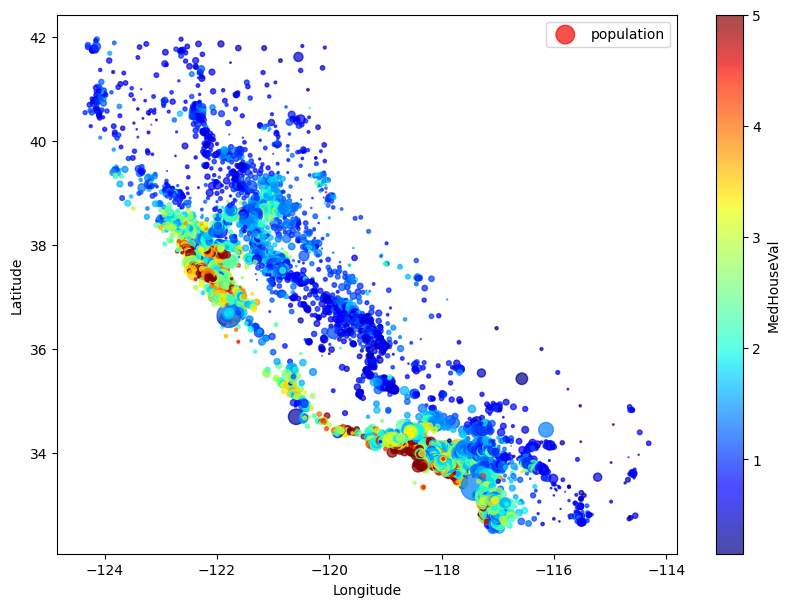

In [ ]:
housing.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=housing['Population']/100, label="population", alpha=0.7)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Fetch the California housing dataset
housing = fetch_california_housing(as_frame=True)
housing = housing.frame
housing.head()

# Now you can use 'housing'
X = housing[["MedInc"]]
y = housing["MedHouseVal"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr = LinearRegression()
lr.fit(X_train.values, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
r2_score(y_test, y_pred)

0.45885918903846656

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame

# 2. Prepare the data
# Select features (X) and target (y)
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = data['MedHouseVal']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 7. (Optional) Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.02327770606409


In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [ ]:
with open('model.pkl', 'rb') as file: # Changed model.pkl to 'model.pkl'
    clf2 = pickle.load(file)

In [ ]:
#If the as_frame parameter is true then the X and y variables will be presented in a pandas dataframe
#If as_frame is false the data will be presented in an array

housing = fetch_california_housing(as_frame=True)
housing = housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


from matplotlib import pyplot as plt
_df_12['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
X = housing.drop(columns=['MedHouseVal'])
y = housing['MedHouseVal']

In [ ]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

shape of X: (20640, 8)
shape of y: (20640,)


In [ ]:
import pickle

# Assuming 'lr' is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
clf = DecisionTreeClassifier()
model = clf.fit(x, y)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



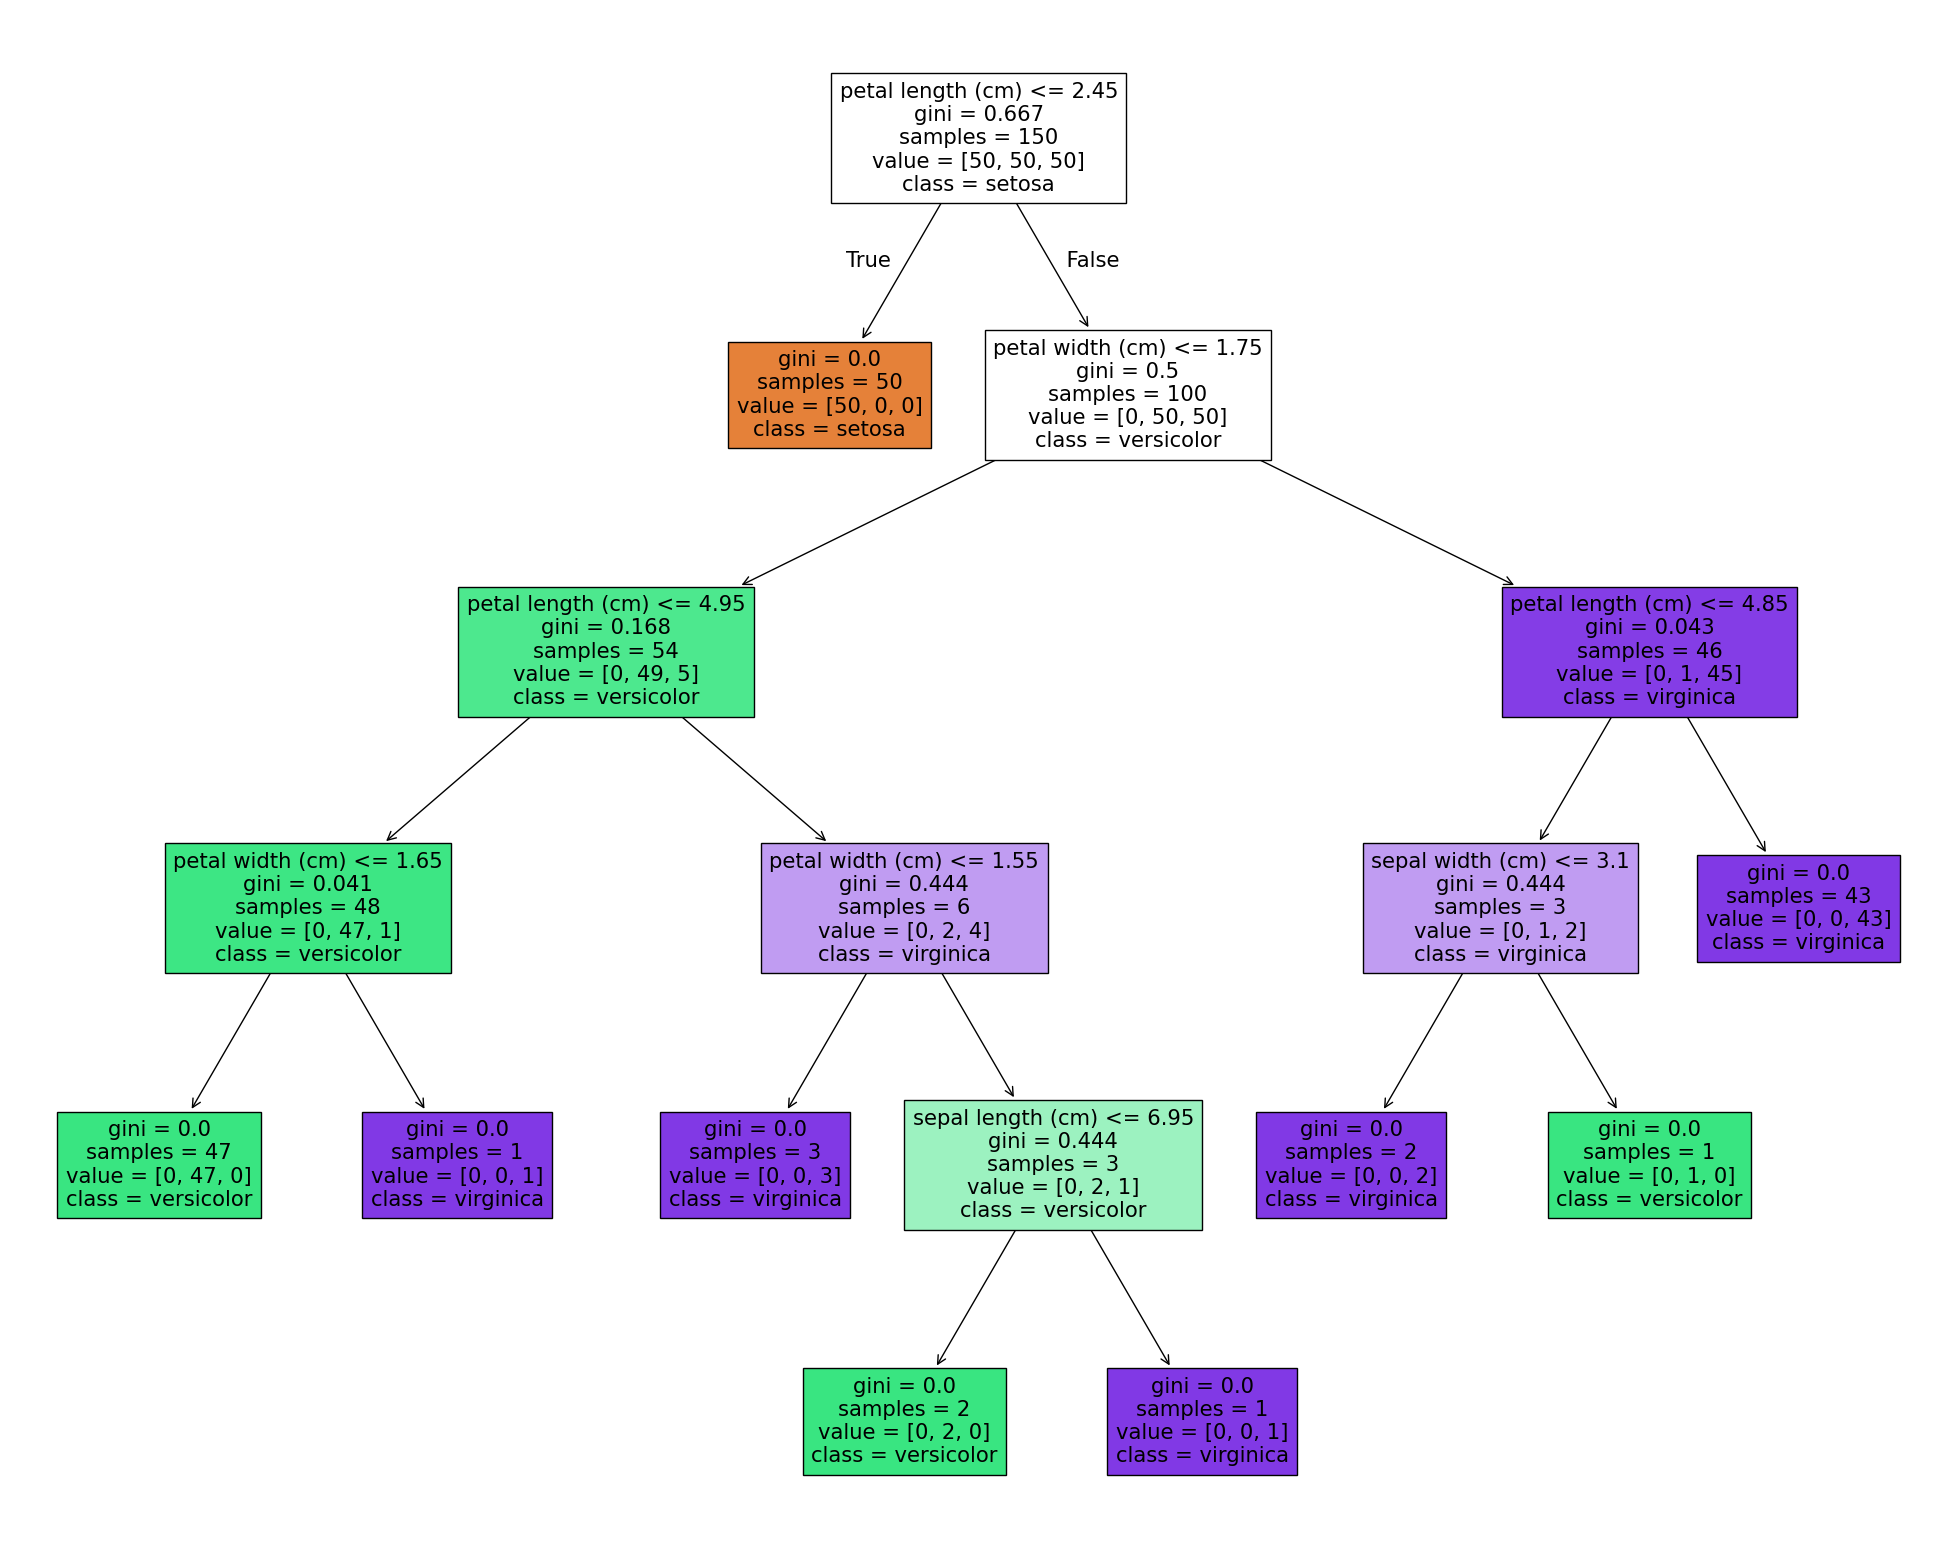

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=iris['feature_names'],
                   class_names=iris['target_names'],
                   filled=True)

In [ ]:
# importing required libraries
# importing scikit-learn library and datasets package
from sklearn import datasets

# loading the iris dataset
iris = datasets.load_iris()

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# dividing the datasets into two parts i.e. training datasets and test datasets
X, y = datasets.load_iris(return_X_y=True)
# Splitting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 80 % training dataset and 20 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Create and train the Random Forest model
clf = RandomForestClassifier(n_estimators=100)  # Now RandomForestClassifier is defined
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9666666666666667


In [ ]:
clf.predict([[3 ,3 ,2 , 2]])

array([0])

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

,0
petal width (cm),0.431635
petal length (cm),0.422303
sepal length (cm),0.119339
sepal width (cm),0.026724


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("titanic.csv")

# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)

# Separate features (X) and target (y)
inputs = df.drop('Survived', axis='columns')
target = df['Survived']

# Map the 'Sex' column to numerical values
inputs['Sex'] = inputs['Sex'].map({'male': 1, 'female': 2})

# Fill missing values in 'Age' column with the mean
inputs['Age'] = inputs['Age'].fillna(inputs['Age'].mean())

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.79


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('titanic.csv')

# Handle missing data (e.g., Age, Embarked)
imputer = SimpleImputer(strategy='most_frequent')
df['Age'] = imputer.fit_transform(df[['Age']])

# Use fillna with mode for 'Embarked' to handle missing categorical values directly
# This avoids the issue of incorrect dimensions
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encoding categorical columns
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Feature Engineering: Extracting Titles from Name
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')


Random Forest Accuracy: 81.01%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Features and Target
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 79.89%


<ipython-input-58-951e9f0be530>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-58-951e9f0be530>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Accuracy: 75.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       105
           1       0.70      0.74      0.72        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.76      0.76      0.76       179


Confusion Matrix:
[[81 24]
 [19 55]]


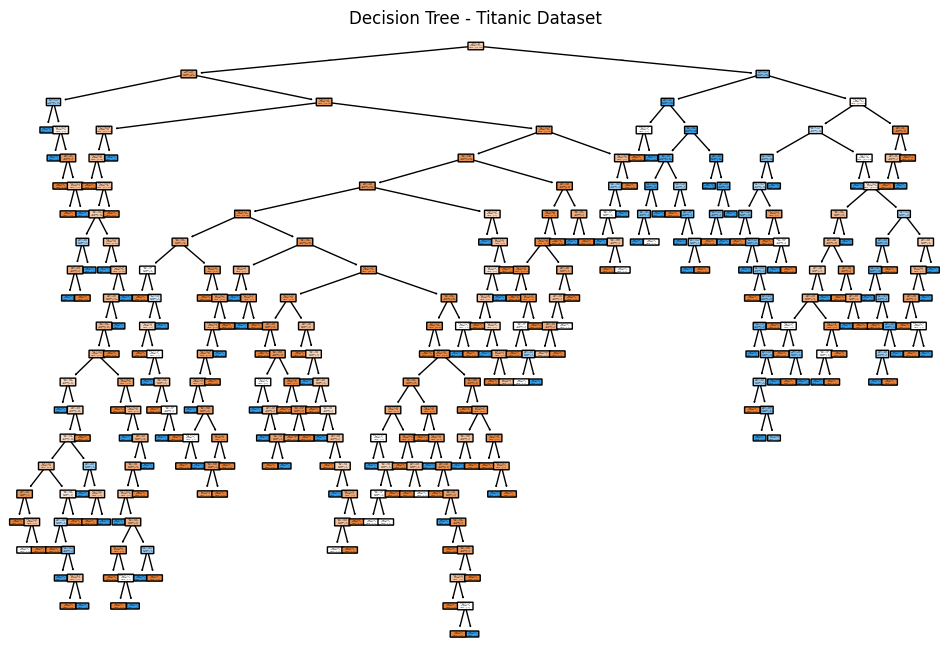

In [ ]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Step 1: Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Step 2: Data Preprocessing (Handling missing values and encoding)
# Handle missing data (e.g., Age, Embarked)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encoding categorical columns ('Sex', 'Embarked', 'Pclass')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Step 3: Selecting Features (X) and Target (y)
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]  # Selecting relevant features
y = df['Survived']  # Target variable

# Step 4: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title("Decision Tree - Titanic Dataset")
plt.show()


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("spam.csv")

In [ ]:
#encoding labels
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=0.2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)
#From this code we are changing the email into code with vector, and the below given is "Vector"

array([0, 1])

In [ ]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)
#The below result indicates spam, as the value is near 1.

0.9856502242152466

{'nbformat': 4,
 'nbformat_minor': 0,
 'metadata': {'colab': {'provenance': []},
  'kernelspec': {'name': 'python3', 'display_name': 'Python 3'},
  'language_info': {'name': 'python'}}}

In [ ]:
import pandas as pd # Add this line to import pandas library
dataset = pd.read_csv("purchase_or_not.csv")
# storing the input values in the X variables
X = dataset.iloc[:, :-1].values
# storing the output values in the y variables
y = dataset.iloc[:, -1].values

In [ ]:
import pandas as pd # Add this line to import pandas library
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.neighbors import KNeighborsClassifier

dataset = pd.read_csv("purchase_or_not.csv")
# storing the input values in the X variables
X = dataset.iloc[:, :-1].values
# storing the output values in the y variables
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added this line to split the data

# IMporting KNN Algorithm
# K value set to be 3
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train) # Now x_train and y_train are defined
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)



In [ ]:
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97
